In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
%matplotlib inline

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [10]:
X_train[11]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

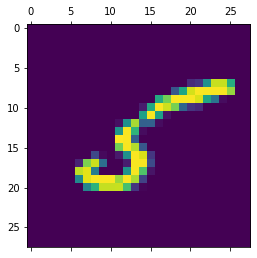

In [8]:
plt.matshow(X_train[11])

In [9]:
y_train[11]

5

In [19]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
#Flattening the features into 1D
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [21]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 821us/step - loss: 0.4867 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 2s 822us/step - loss: 0.3061 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 855us/step - loss: 0.2849 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 2s 825us/step - loss: 0.2748 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 2s 826us/step - loss: 0.2678 - accuracy: 0.9261


In [23]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 582us/step - loss: 0.2649 - accuracy: 0.9256


[0.2648792266845703, 0.925599992275238]

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

array([2.1732878e-06, 4.4406745e-01, 9.2022419e-03, 2.5114715e-03,
       1.5357137e-04, 5.3733587e-04, 1.1597574e-03, 1.0102093e-03,
       2.8766096e-03, 2.2956729e-04], dtype=float32)

In [28]:
np.argmax(y_predicted[2])

1

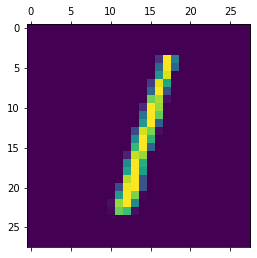

In [29]:
plt.matshow(X_test[2])

In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

Text(69.0, 0.5, 'Truth')

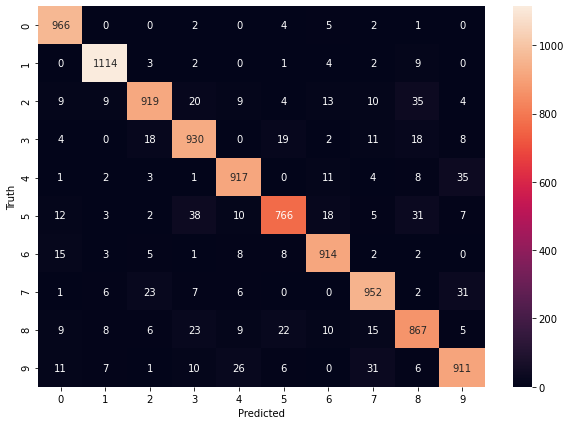

In [33]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2898 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.1337 - accuracy: 0.9608
Epoch 3/5
1875/1875 [==============================] - 2s 926us/step - loss: 0.0966 - accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.0741 - accuracy: 0.9781
Epoch 5/5
1875/1875 [==============================] - 2s 906us/step - loss: 0.0617 - accuracy: 0.9812


In [35]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 797us/step - loss: 0.0884 - accuracy: 0.9732


[0.08842717856168747, 0.9732000231742859]

Text(69.0, 0.5, 'Truth')

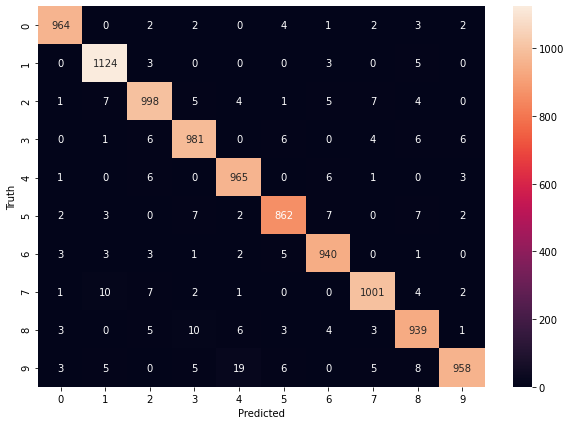

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"]
             )
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2996 - accuracy: 0.9160
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1381 - accuracy: 0.9601
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0982 - accuracy: 0.9707
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0769 - accuracy: 0.9767
Epoch 5/5
1875/1875 [==============================] - 2s 883us/step - loss: 0.0627 - accuracy: 0.9805


In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 782us/step - loss: 0.0848 - accuracy: 0.9750


[0.08480823785066605, 0.9750000238418579]